# Project 5
## Neural Network

In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

## Cleaning Texts

In [13]:
df = pd.read_csv('disaster_tweets.csv')

In [4]:
# df['category'] = df['category'].map({1:'earthquake', 0:'other'})

In [14]:
for index, row in df.iterrows():
    s = df.loc[index, 'text']
    s = re.sub('(http\S+)', '', s)
    s = re.sub("[^A-Za-z0-9]+",' ', s)
    df.loc[index, 'text'] = s


In [15]:
df.dropna(inplace=True)

In [16]:
df

,text,category
0,USGS reports a M0 4 earthquake 10 km N of Lemm...,earthquake
1,Earthquake zemljotres possibly felt 22 sec ag...,earthquake
2,Of course hoping U might actually created a ea...,other
3,apparently an earthquake happened near where i...,earthquake
4,tassy baartman Maar earthquake ena we know why,other
...,...,...
2546,percytheparrot Dominiquetaegon Also why we do...,drought
2547,Kneemerson There is also drought in the UK,drought
2548,Football is back We survived the drought,other
2549,We ve been warned for decades We chose not to ...,drought


In [17]:
df['category'].value_counts()

other         970
storm         700
flood         305
drought       303
earthquake    231
Name: category, dtype: int64

In [18]:
STOPWORDS = set(stopwords.words('english'))
len(STOPWORDS)

179

In [19]:
articles = []
lables = []
for index, row in df.iterrows():
    lables.append(row['category'])
    
    token_list = [x for x in row['text'].split() if x not in STOPWORDS]
    
    articles.append(' '.join(token_list))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(articles, lables, random_state=42, test_size=0.2, stratify=lables)

### Tokenization

In [12]:
vocab_size = 5000 
embedding_dim = 64 
max_length = 200 
trunc_type = 'post' 
padding_type = 'post'
oov_tok = '<OOV>'

In [13]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
tokenizer.word_index

{'<OOV>': 1,
 'earthquake': 2,
 'storms': 3,
 'thunderstorm': 4,
 'drought': 5,
 'i': 6,
 '1': 7,
 'heavy': 8,
 'rainfall': 9,
 'flooding': 10,
 'warning': 11,
 '18': 12,
 '0': 13,
 'severe': 14,
 'flood': 15,
 'flash': 16,
 'the': 17,
 'rain': 18,
 'pm': 19,
 'radar': 20,
 'amp': 21,
 'water': 22,
 '2': 23,
 'indicated': 24,
 '2022': 25,
 '8': 26,
 'mph': 27,
 'time': 28,
 'km': 29,
 '3': 30,
 'wind': 31,
 'in': 32,
 'till': 33,
 'a': 34,
 'aug': 35,
 'like': 36,
 'utc': 37,
 'cdt': 38,
 'hail': 39,
 'areas': 40,
 '30': 41,
 '08': 42,
 'weather': 43,
 'near': 44,
 '10': 45,
 'it': 46,
 'issues': 47,
 'expected': 48,
 '5': 49,
 '17': 50,
 'people': 51,
 '60': 52,
 'magnitude': 53,
 'strong': 54,
 'could': 55,
 'az': 56,
 'lightning': 57,
 'we': 58,
 'this': 59,
 '22': 60,
 'possible': 61,
 'one': 62,
 '19': 63,
 'year': 64,
 'and': 65,
 '4': 66,
 'gt': 67,
 'continues': 68,
 'winds': 69,
 'usgs': 70,
 '45': 71,
 'reports': 72,
 'hour': 73,
 'due': 74,
 'new': 75,
 'river': 76,
 'mst': 

In [14]:
train_seq = tokenizer.texts_to_sequences(X_train)

### Padding

In [15]:
train_padded = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Encode

In [21]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
le.classes_

array(['drought', 'earthquake', 'flood', 'other', 'storm'], dtype='<U10')

In [18]:
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

### Model

In [19]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout 
from tensorflow.keras import regularizers

In [20]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length)) # first layer is 
#model.add(Bidirectional(GRU(64, return_sequences=True)))
#model.add(Bidirectional(LSTM(64)))
model.add(Bidirectional(GRU(64)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(0.1)))

model.summary()

2022-09-03 17:16:00.776334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49920     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 370,565
Trainable params: 370,565
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [22]:
history = model.fit(train_padded, y_train, validation_data=(test_padded, y_test), batch_size = 256, epochs = 13)

Epoch 1/13
8/8 [==============================] - 6s 380ms/step - loss: 2.4987 - acc: 0.3572 - val_loss: 2.3878 - val_acc: 0.3865
Epoch 2/13
8/8 [==============================] - 2s 314ms/step - loss: 2.3095 - acc: 0.3881 - val_loss: 2.2145 - val_acc: 0.3865
Epoch 3/13
8/8 [==============================] - 3s 322ms/step - loss: 2.1610 - acc: 0.3891 - val_loss: 2.1010 - val_acc: 0.3865
Epoch 4/13
8/8 [==============================] - 3s 320ms/step - loss: 2.0324 - acc: 0.4180 - val_loss: 1.9677 - val_acc: 0.4741
Epoch 5/13
8/8 [==============================] - 2s 306ms/step - loss: 1.8764 - acc: 0.4828 - val_loss: 1.8096 - val_acc: 0.4900
Epoch 6/13
8/8 [==============================] - 3s 319ms/step - loss: 1.6902 - acc: 0.5401 - val_loss: 1.6474 - val_acc: 0.5438
Epoch 7/13
8/8 [==============================] - 3s 344ms/step - loss: 1.4874 - acc: 0.6208 - val_loss: 1.5009 - val_acc: 0.5717
Epoch 8/13
8/8 [==============================] - 3s 333ms/step - loss: 1.2948 - acc: 0.70

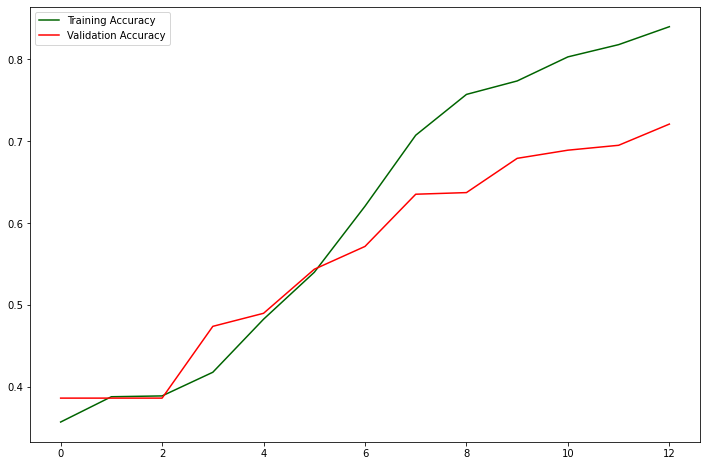

In [24]:
plt.figure(figsize = (12, 8))


plt.plot(history.history['acc'], label = 'Training Accuracy', color = 'darkgreen')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy', color = 'red')

plt.legend();

In [25]:
df['category'].value_counts(normalize=True)

other         0.386608
storm         0.278996
flood         0.121562
drought       0.120765
earthquake    0.092069
Name: category, dtype: float64

In [26]:
(model.predict(test_padded) > 0.5 ).astype('int32')

16/16 [==============================] - 1s 16ms/step


array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=int32)

In [6]:
test_seq = tokenizer.texts_to_sequences(['PSR continues Severe Thunderstorm Warning wind 60 MPH RADAR INDICATED hail lt 75 IN RADAR INDICATED La ','shaking here, scared'])
test_padded = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

NameError: name 'max_length' is not defined

In [8]:
(model.predict(test_padded) > 0.5 ).astype('int32')
#model.predict(test_padded)

1/1 [==============================] - 0s 27ms/step


array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]], dtype=int32)

In [92]:
X_test

['CStewMedia accuweather And cat terrified Animals storms whole topic',
 'BorisJohnson Thought decided action No action cost living crisis fuel bills drought climate change issues rest You go stop attention seeking',
 'PSR continues Severe Thunderstorm Warning wind 60 MPH RADAR INDICATED hail lt 75 IN RADAR INDICATED La Paz Yuma AZ till 8 30 PM MST',
 'wow letting write SEP entry set theory hell yea',
 'Earthquake sismo M3 0 strikes 105 km NW Villa Alota Bolivia 15 min ago More info',
 'atRachelGilmore Hey atRachelGilmore world hunger war drought',
 'Large earthquakes rupture complicated ways developed new method imaging earthquake ruptures Check new paper Frequency Difference Backprojection Great job Jing Ci',
 'Earthquake M4 8 New Caledonia Southeast Loyalty Islands 18 Aug 17 43 UTC report info',
 'More storms way Thursday morning',
 'BIS expires Severe Thunderstorm Warning Kidder Logan Stutsman ND',
 'drmslesbian HELP literally told going dream move soon big dream drought thought sr

In [22]:
le.inverse_transform([0,0,0,0,1])

array(['drought', 'drought', 'drought', 'drought', 'earthquake'],
      dtype='<U10')

In [62]:
y_test

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
le.inverse_transform([np.argmax([0, 0, 0,0, 1])])

array(['storm'], dtype='<U10')

In [95]:
test_padded

array([[ 113,   68,   14,    4,   11,   31,   52,   27,   20,   24,   39,
         103,   83,   32,   20,   24,  120,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [96]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [1]:
import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [5]:
test_seq = tokenizer.texts_to_sequences(['PSR continues Severe Thunderstorm Warning wind 60 MPH RADAR INDICATED hail lt 75 IN RADAR INDICATED La ','shaking here, scared'])
test_padded = pad_sequences(test_seq, maxlen=200, padding='post', truncating='post')

In [8]:
test_padded

array([[ 113,   68,   14,    4,   11,   31,   52,   27,   20,   24,   39,
         103,   83,   32,   20,   24,  120,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [29]:
import pickle
pickle.dump(model, open('twitter_model.pickle', 'wb'))

INFO:tensorflow:Assets written to: ram://a8a7920a-8623-4bcc-8e34-7581c8b88ca3/assets


INFO:tensorflow:Assets written to: ram://a8a7920a-8623-4bcc-8e34-7581c8b88ca3/assets


In [2]:
import pickle
model = pickle.load( open('twitter_model.pickle', 'rb'))

2022-09-05 21:43:03.657320: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
